# Analisis de incendios en Australia, Fuente XXXXXXXXXXX
Ramo Minería de datos

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
# Importación de datos
incendios = pd.read_csv("https://raw.githubusercontent.com/Kiki1108/incendios/refs/heads/main/data/nws_australia.csv")
incendios.head()

,FID,FireName,FireNo,Label,StartDate,EndDate,AreaHa,PerimeterM,Verdate,Type,Season,ID,Year,Year_Con,Shape__Area,Shape__Length
0,1,,,1968-69 Prescribed Burn,1968/10/01 00:00:00+00,1970/01/01 00:00:00+00,2.184770,1548.960666,26/03/2020,Prescribed Burn,1968-69,0,1968,1968/01/01 00:00:00+00,2.186876e+04,1549.703956
1,2,,,1970-71 Prescribed Burn,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,299.985464,8615.637120,26/03/2020,Prescribed Burn,1970-71,1,1970,1970/01/01 00:00:00+00,2.996520e+06,8610.851395
2,3,,70/161,1970-71 Prescribed Burn,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,309.025645,20657.633993,26/03/2020,Prescribed Burn,1970-71,2,1970,1970/01/01 00:00:00+00,3.085906e+06,20643.091296
3,4,,70/161,1970-71 Prescribed Burn,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,316.104427,20353.231751,26/03/2020,Prescribed Burn,1970-71,3,1970,1970/01/01 00:00:00+00,3.156677e+06,20339.165555
4,5,,70/160,1970-71 Prescribed Burn,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,28.484088,2695.160793,26/03/2020,Prescribed Burn,1970-71,4,1970,1970/01/01 00:00:00+00,2.844296e+05,2693.214793


### ¿Qué significa cada una de las columnas?

In [3]:
# Analisis de missing values
incendios.isna().sum()

FID               0
FireName          1
FireNo           12
Label             0
StartDate         0
EndDate           0
AreaHa            0
PerimeterM        0
Verdate           0
Type              0
Season            0
ID                0
Year              0
Year_Con          0
Shape__Area       0
Shape__Length     0
dtype: int64

In [4]:
# Revisión de duplicados
print(incendios.duplicated().sum())

0


In [5]:
# Descriptores generales
# Cantidad, media, desviación estandar, minimo, maximo, quartiles.
incendios.describe()

,FID,AreaHa,PerimeterM,ID,Year,Shape__Area,Shape__Length
count,33804.000000,3.380400e+04,3.380400e+04,33804.000000,33804.000000,3.380400e+04,3.380400e+04
mean,16902.500000,1.012303e+03,9.208709e+03,16998.042155,1995.127855,8.964766e+06,9.060521e+03
std,9758.518586,2.400818e+04,4.278678e+04,9794.601518,15.009253,1.472570e+08,3.837847e+04
min,1.000000,3.000000e-08,1.988490e-01,0.000000,1902.000000,0.000000e+00,1.989026e-01
25%,8451.750000,2.661483e+00,7.504432e+02,8506.750000,1985.000000,2.652021e+04,7.495105e+02
50%,16902.500000,2.317436e+01,2.544122e+03,16987.500000,1997.000000,2.302856e+05,2.539695e+03
75%,25353.250000,1.616914e+02,7.680806e+03,25488.250000,2007.000000,1.610715e+06,7.663567e+03
max,33804.000000,3.465373e+06,3.172177e+06,33943.000000,2019.000000,1.466174e+10,3.169235e+06


In [6]:
# Revisión de tipos de datos
incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33804 entries, 0 to 33803
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FID            33804 non-null  int64  
 1   FireName       33803 non-null  object 
 2   FireNo         33792 non-null  object 
 3   Label          33804 non-null  object 
 4   StartDate      33804 non-null  object 
 5   EndDate        33804 non-null  object 
 6   AreaHa         33804 non-null  float64
 7   PerimeterM     33804 non-null  float64
 8   Verdate        33804 non-null  object 
 9   Type           33804 non-null  object 
 10  Season         33804 non-null  object 
 11  ID             33804 non-null  int64  
 12  Year           33804 non-null  int64  
 13  Year_Con       33804 non-null  object 
 14  Shape__Area    33804 non-null  float64
 15  Shape__Length  33804 non-null  float64
dtypes: float64(4), int64(3), object(9)
memory usage: 4.1+ MB


In [7]:
# Revisión de valores únicos por columna
cols = incendios.columns.tolist()
for col in cols:
    print(f"{col}: {incendios[col].unique()}")

FID: [    1     2     3 ... 33802 33803 33804]
FireName: [' ' 'Humbug' 'Interface' ... 'Jinden' 'Clyde Mountain Fire'
 'Badja Forest Rd, Countegany']
FireNo: [' ' '70/161' '70/160' ... '20010269276' '19122967266' '19122766937']
Label: ['1968-69 Prescribed Burn' '1970-71 Prescribed Burn'
 '1971-72 Prescribed Burn' '1972-73 Prescribed Burn'
 '1974-75 Prescribed Burn' '1976-77 Prescribed Burn'
 '1977-78 Prescribed Burn' '1978-79 Prescribed Burn'
 '1979-80 Prescribed Burn' '1980-81 Prescribed Burn'
 '1981-82 Prescribed Burn' '1982-83 Prescribed Burn'
 '1983-84 Prescribed Burn' '1984-85 Prescribed Burn'
 '1985-86 Prescribed Burn' '1986-87 Prescribed Burn'
 '1987-88 Prescribed Burn' '1988-89 Prescribed Burn'
 '1989-90 Prescribed Burn' '1990-91 Prescribed Burn'
 '1991-92 Prescribed Burn' '1992-93 Prescribed Burn'
 '1993-94 Prescribed Burn' '1994-95 Prescribed Burn'
 '1995-96 Prescribed Burn' '1996-97 Prescribed Burn'
 '1997-98 Prescribed Burn' '1998-99 Prescribed Burn'
 '1999-00 Prescribed Bu

### Qué preguntantas nos podemos hacer??

<ul>
    <li>¿En qué mes hay más incencios?</li>
    <li>¿Cuál es la distribución con los incendios en fecha?</li>
    <li>¿Cuál es la distribución con los incendios por año?</li>
    <li>Area por mes</li>
    <li>Area por año</li>
    <li>CSV datos metereológicos</li>
</ul>

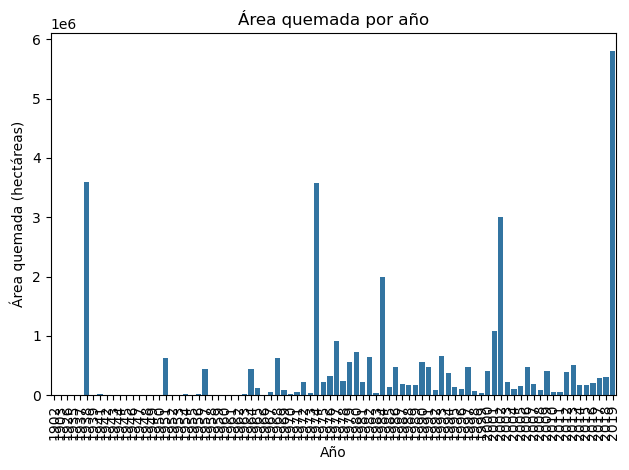

In [8]:
# Años con más incendios
area_anual = incendios.groupby("Year")["AreaHa"].sum()

area_anual_df = area_anual.reset_index()  # convierte Series a DataFrame

sns.barplot(data=area_anual_df, x="Year", y="AreaHa")

plt.title("Área quemada por año")
plt.xlabel("Año")
plt.ylabel("Área quemada (hectáreas)")
plt.xticks(rotation=90)  # gira las etiquetas del eje x si hay muchos años
plt.tight_layout()
plt.show()


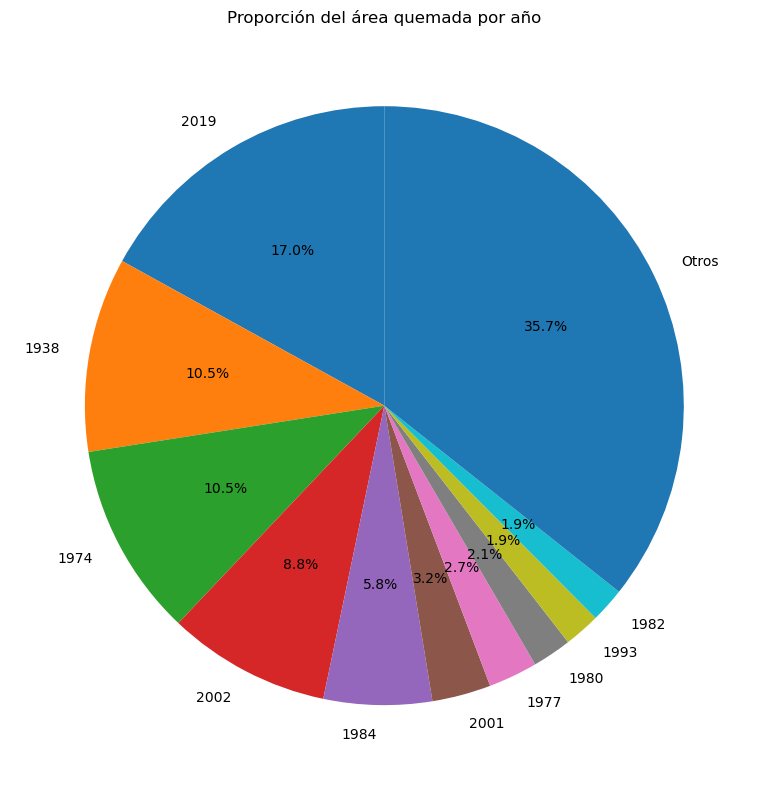

In [9]:
# Usamos los datos agrupados que ya tienes
area_anual = incendios.groupby("Year")["AreaHa"].sum()

# Ordenamos de mayor a menor para que se vea más claro
area_anual = area_anual.sort_values(ascending=False)

# Si hay demasiados años, mejor mostrar solo los más relevantes
top_n = 10
area_top = area_anual.head(top_n)
otros = area_anual.iloc[top_n:].sum()
area_top["Otros"] = otros  # agrupamos los años menores como "Otros"

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(area_top, labels=area_top.index, autopct="%1.1f%%", startangle=90)

plt.title("Proporción del área quemada por año")
plt.tight_layout()
plt.show()

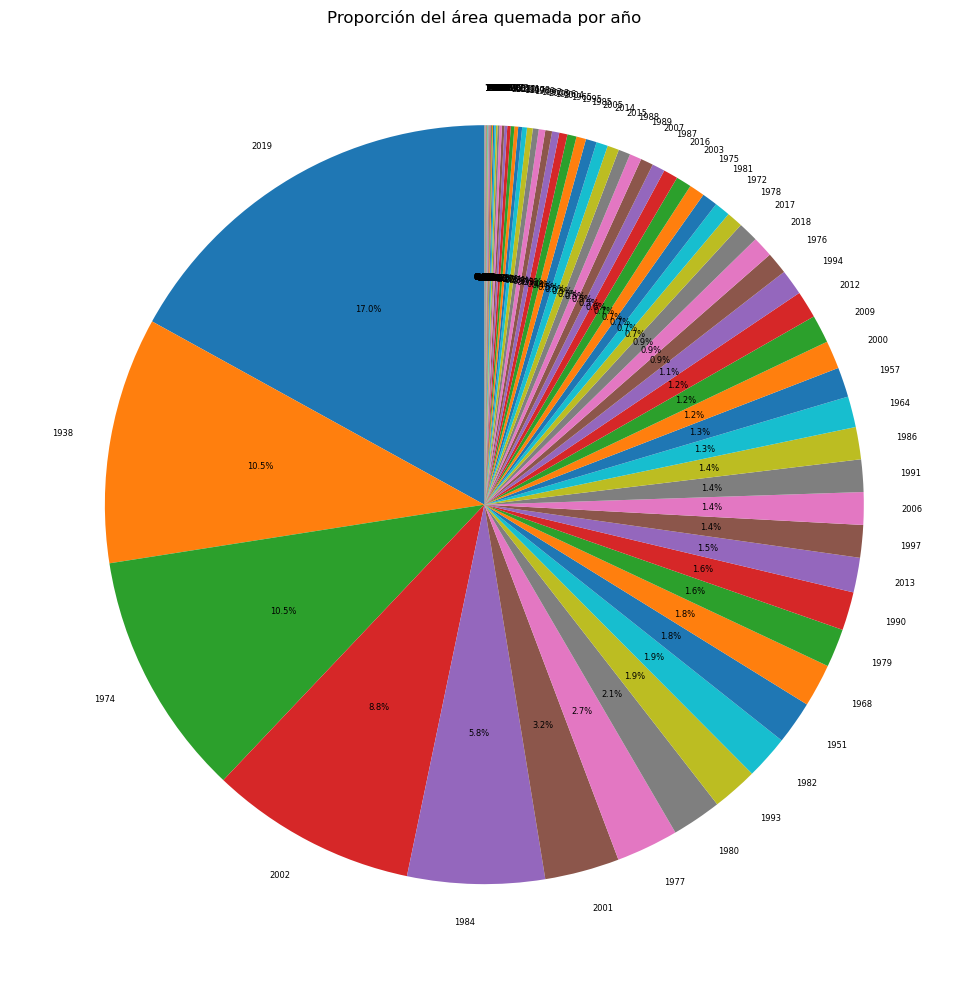

In [10]:
# Ordenamos de mayor a menor (opcional)
area_anual = area_anual.sort_values(ascending=False)

# Gráfico de torta
plt.figure(figsize=(10, 10))
plt.pie(
    area_anual,
    labels=area_anual.index,
    autopct="%1.1f%%",
    startangle=90,
    textprops={'fontsize': 6}  # Tamaño de letra más pequeño
)

plt.title("Proporción del área quemada por año", fontsize=12)
plt.tight_layout()
plt.show()

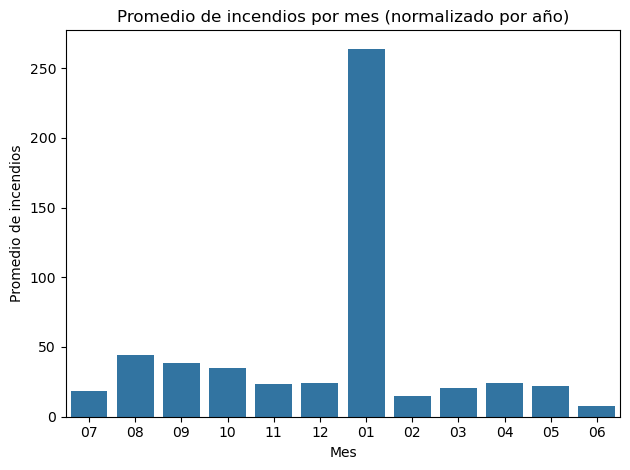

In [11]:
# Asegúrate de que las fechas estén bien
incendios["StartDate"] = pd.to_datetime(incendios["StartDate"])
incendios["mes_incendio"] = incendios["StartDate"].dt.strftime("%m")
incendios["anio"] = incendios["StartDate"].dt.year

# Contar cantidad de incendios por mes y año
conteo_por_mes_anio = incendios.groupby(["mes_incendio", "anio"]).size().reset_index(name="cantidad")

# Calcular el promedio por mes
promedio_incendios_mes = conteo_por_mes_anio.groupby("mes_incendio")["cantidad"].mean().reset_index()

# Ordenar los meses
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

# Gráfico
sns.barplot(data=promedio_incendios_mes, x="mes_incendio", y="cantidad", order=orden_meses)

plt.title("Promedio de incendios por mes (normalizado por año)")
plt.xlabel("Mes")
plt.ylabel("Promedio de incendios")
plt.tight_layout()
plt.show()


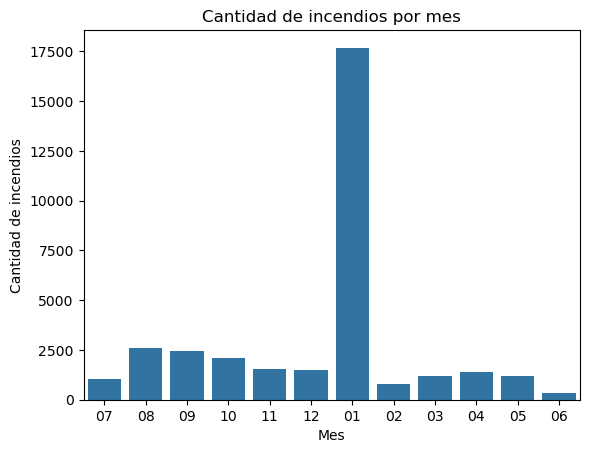

In [12]:
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

sns.countplot(data=incendios, x="mes_incendio", order=orden_meses)


plt.title("Cantidad de incendios por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de incendios")
plt.show()

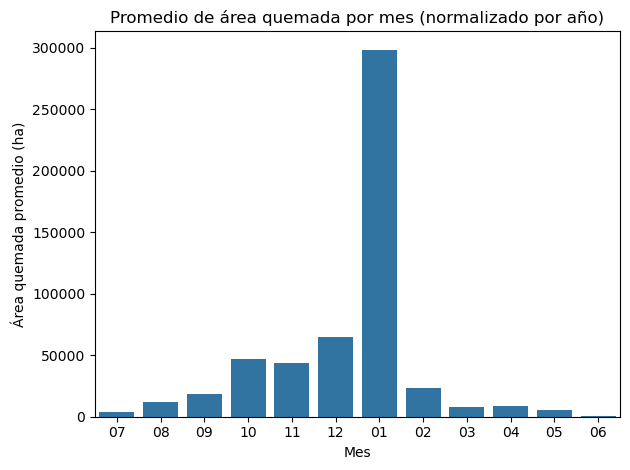

In [13]:
# Asegúrate que 'StartDate' está en datetime (ya lo tienes)
incendios["StartDate"] = pd.to_datetime(incendios["StartDate"])

# Extraer mes y año
incendios["mes_incendio"] = incendios["StartDate"].dt.strftime("%m")
incendios["anio"] = incendios["StartDate"].dt.year

# Crear tabla con área total por mes y año
area_por_mes_anio = incendios.groupby(["mes_incendio", "anio"])["AreaHa"].sum().reset_index()

# Ahora agrupamos solo por mes para sacar el promedio
area_mes_promedio = area_por_mes_anio.groupby("mes_incendio")["AreaHa"].mean().reset_index()

# Orden de meses
orden_meses = ['07', '08', '09', '10', '11', '12', '01', '02', '03', '04', '05', '06']

# Gráfico
sns.barplot(data=area_mes_promedio, x="mes_incendio", y="AreaHa", order=orden_meses)

plt.title("Promedio de área quemada por mes (normalizado por año)")
plt.xlabel("Mes")
plt.ylabel("Área quemada promedio (ha)")
plt.tight_layout()
plt.show()


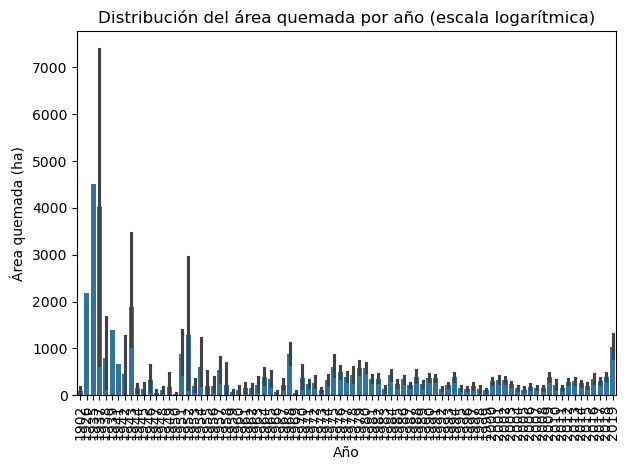

In [14]:
# Asegúrate de que las fechas están en formato datetime
incendios["StartDate"] = pd.to_datetime(incendios["StartDate"])
incendios["EndDate"] = pd.to_datetime(incendios["EndDate"])

# Calcular la duración del incendio en días
incendios["Duracion"] = (incendios["EndDate"] - incendios["StartDate"]).dt.days

# Filtrar los datos para eliminar valores extremos
incendios_filtrado = incendios[
    (incendios["Duracion"] >= 0) &  # Eliminar duraciones negativas
    (incendios["AreaHa"] <= incendios["AreaHa"].quantile(0.99))  # Eliminar áreas demasiado grandes (percentil 99)
]

# Crear el boxplot
sns.barplot(data=incendios_filtrado, x="Year", y="AreaHa")

# Configurar el gráfico
#plt.yscale("log")  # Aplicar escala logarítmica al eje y
plt.title("Distribución del área quemada por año (escala logarítmica)")
plt.xlabel("Año")
plt.ylabel("Área quemada (ha)")
plt.xticks(rotation=90)  # Rotar etiquetas del eje x si hay muchos años
plt.tight_layout()
plt.show()